# Covid-19 Image Classification – Analysis & EDA

## Objective
To analyze the Covid-19 chest X-ray dataset, understand class distribution,
image characteristics, and identify potential challenges before model training.


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import pandas as pd


In [2]:
train_dir = "../data/processed/train"
classes = ["Covid", "Normal", "Viral Pneumonia"]


In [3]:
class_counts = {}

for cls in classes:
    class_path = os.path.join(train_dir, cls)
    class_counts[cls] = len(os.listdir(class_path))

class_counts


{'Covid': 92, 'Normal': 62, 'Viral Pneumonia': 62}

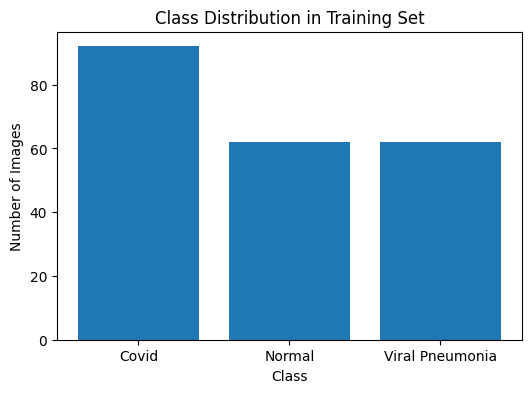

In [4]:
plt.figure(figsize=(6,4))
plt.bar(class_counts.keys(), class_counts.values())
plt.title("Class Distribution in Training Set")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()


- Covid class has more images than Normal and Viral Pneumonia.
- The dataset is slightly imbalanced.
- This imbalance may affect model performance and will be handled during training.


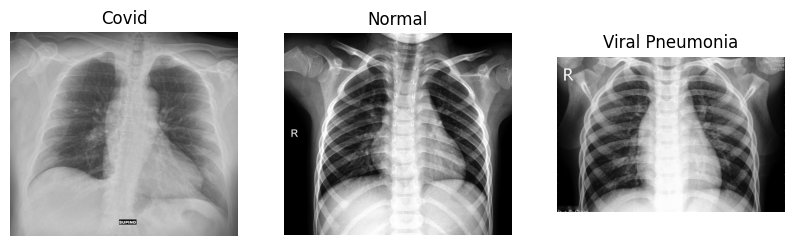

In [5]:
plt.figure(figsize=(10,4))

for i, cls in enumerate(classes):
    img_path = os.path.join(train_dir, cls, os.listdir(os.path.join(train_dir, cls))[0])
    img = Image.open(img_path)

    plt.subplot(1,3,i+1)
    plt.imshow(img, cmap='gray')
    plt.title(cls)
    plt.axis("off")

plt.show()


In [6]:
image_sizes = []

for cls in classes:
    class_path = os.path.join(train_dir, cls)
    for img_name in os.listdir(class_path)[:20]:  # sample 20 images
        img_path = os.path.join(class_path, img_name)
        img = Image.open(img_path)
        image_sizes.append(img.size)

pd.DataFrame(image_sizes, columns=["Width", "Height"]).describe()


,Width,Height
count,60.000000,60.000000
mean,1602.833333,1274.583333
std,557.824532,501.556705
min,416.000000,341.000000
25%,1222.000000,871.750000
50%,1608.000000,1311.000000
75%,1925.000000,1488.250000
max,2972.000000,2840.000000


- Images have varying resolutions.
- Models require uniform input size.
- Images will be resized during preprocessing.


In [7]:
modes = []

for cls in classes:
    img_path = os.path.join(train_dir, cls, os.listdir(os.path.join(train_dir, cls))[0])
    img = Image.open(img_path)
    modes.append((cls, img.mode))

modes


[('Covid', 'RGBA'), ('Normal', 'RGB'), ('Viral Pneumonia', 'RGB')]

- Images are mostly grayscale or RGB.
- During preprocessing, all images will be converted to RGB format.


## EDA Summary

- The dataset contains three classes: Covid, Normal, and Viral Pneumonia.
- Slight class imbalance exists.
- Images vary in size and color format.
- Preprocessing steps such as resizing, normalization, and augmentation are required.
